In [48]:
# load libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

from action_prediction import constants as const
from action_prediction.data import DataSet
from action_prediction import visualize as vis

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# initialize dataset
data = DataSet(task='action_observation')

# load behavior
df_behav = data.load_behav()

# load eyetracking
df_eye = data.load_eye()


In [50]:
# initialize plotting style
vis.plotting_style()

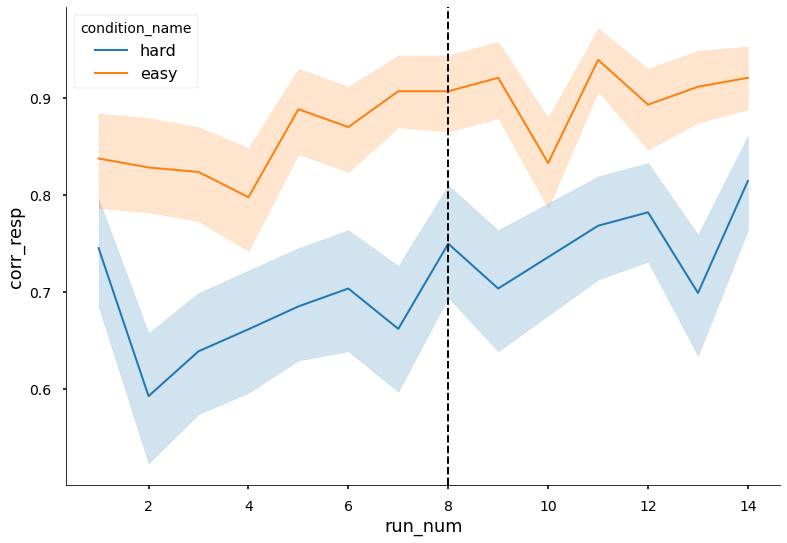

In [51]:
# visualize accuracy across runs
vis.plot_acc(dataframe=df_behav, hue='condition_name')

In [ ]:
# visualize rt across runs
vis.plot_rt(dataframe=df_behav, hue='condition_name')

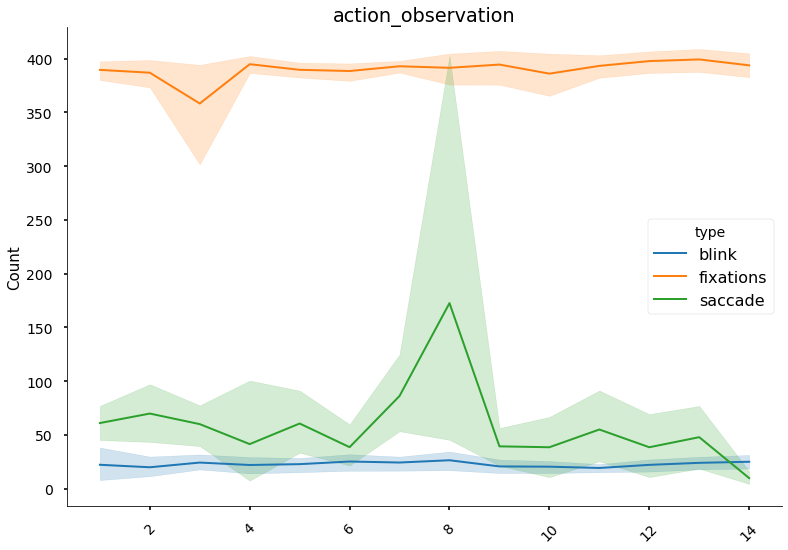

In [85]:
# plot fixation, saccade, blink count across runs
vis.plot_count_events(dataframe=df_eye)